# Tutorial Basics Noten Part 1: Einführung und Visualisierung

(version 2022_01_24)

### Inhaltsverzeichnis: 
1. [Jupyter-Notebook: Grundlegende Funktionen](#grundlagen)
2. [Laden von Notendateien (MusicXML)](#laden)
3. [Exkurs: Der xml-Parser und das Pandas-Dataframe](#xml-parser)
4. [Pianorollen-Visualisierung](#pianorollen)
5. [Auswahl von Stimmen bzw. Takten](#auswahl)
6. [Aufgaben](#aufgaben)

Dieses Tutorial führt in den Aufbau und die Funktionsweise eines Jupyter-Notebooks ein und zeigt, wie CAMAT (Computer-Assisted Music Analysis Tool) für die Visualisierung und Analyse von Notendaten genutzt werden kann.

Auf dieser Grundlage präsentiert das Tutorial Part 2 Möglichkeiten einfacher statistischer Abfragen. 

### 1. Jupyter-Notebook: Grundlegende Funktionen <a id='grundlagen'></a>

Ein Jupyter-Notebook ist eine Datei, die im Browser geöffnet und bearbeitet werden kann. Jedes Jupyter-Notebook besteht aus einer Folge von Textblöcken (Markdown Cells) und Blöcken mit Programmiercode in der Programmiersprache Python (Code Cells). Indem innerhalb eines Blocks die Eingabetaste gedrückt wird, kann Text oder Code geändert, hinzugefügt oder gelöscht werden. 
Eigene, veränderte Versionen des Notebooks können unter neuem Namen abgespeichert werden (Menu: File -> Save as...). 

WICHTIG: Die Befehle jeder einzelnen Code Cell werden mit dem Run-Button ausgeführt. Während der Ausführung (die bei manchen Befehlen einige Sekunden dauern kann) wird oben auf dem Tab ein Sanduhr-Symbol angezeigt. Anschließend werden ggf. Ergebnisse (oder Fehlermeldungen) angezeigt und der Cursor springt zur nächsten Box. 

Gehen Sie bitte die Tutorials jeweils Code Cell für Code Cell durch, aktivieren Sie den jeweiligen Code jeweils mit dem Run-Button und warten Sie ab, was geschieht!

In den Code Cells werden alle Zeilen hinter einem Rautezeicheen (#) nicht ausgeführt; dies bietet die Möglichkeit, entweder Erläuterungen zum Code in den Code cells zu vermerken oder zusätzliche deaktivierte Befehle zu notieren, die durch Löschen der Raute (und anschließendem Run) ausgeführt werden. 

In [1]:
# Mit den Befehlen können Sie selbstverständlich auch rechnen: 
# Drücken Sie bitte auf 'Run'!

21 * 7 + 1 

# Verändern Sie nun den Rechenbefehl.
# Drücken Sie dann wieder auf 'Run'!

148

Eine neue Cell wird mit dem +-Button oder den Menu-Punkt Insert erzeugt und kann dann im Menu als Markdown oder Code Cell festgelegt werden. Hier können Sie Ihre eigenen Kommentare oder Befehle vermerken. (Und bitte nicht vergessen, das Notebook zuvor unter neuem Namen abzuspeichern!).  

Parallel zum Notebook läuft ein Command-Fenster, das Sie nicht weiter beachten müssen - das Sie aber bitte auch nicht schließen dürfen! Beenden Sie ein Notebook bitte mit dem Menu-Befehl 'File' -> 'Close and Halt', loggen Sie sich dann aus und schließen Sie erst zum Schluss das Command-Fenster. 

Jeder Start eines Jupyter Notebooks beginnt mit dem Import der erforderlichen Python-Bibliotheken:  

In [2]:
import sys
import os
sys.path.append(os.getcwd().replace(os.path.join('music_xml_parser', 'ipynb'), ''))

import music_xml_parser as mp
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mit diesen Befehlen wird der Kern von CAMAT, der 'music_xml_parser', 
# aber u.a. auch die python-Bibliotheken 'numpy' und 'pandas' für statische Auswertungen, 
# 'matplotlib' für grafische Darstellungen, 
# 'csv' für den Tabellenexport geladen 
# sowie 'music21' geladen.

# Durch den folgenden Befehl wird der Download von URLs aus dem Internet erlaubt: 
environment.set('autoDownload', 'allow')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# optimiert die Darstellung im Browser

### 2. Laden von Notendateien (MusicXML) <a id='laden'></a>

Als nächstes wird eine Notendatei im MusicXML-Format (kurz: xml) geladen und mit dem Namen 'xml_file' versehen. Sie können auch jeden beliebigen anderen Namen wählen, müssen dann aber die entsprechenden Befehle in den Code Cells entsprechend verändern!

Beim Laden von Notendateien gibt es zwei Möglichkeiten: 
1. Eine Notendatei wird von der lokalen Festplatte geladen, der zuvor in den Ordner 'data/xmls_to_parse' des 'music_xml_parser' gelegt wurde. Dann muss der Dateiname eingegeben werden (in einfachen Anführungszeichen). 
2. Eine Notendatei wird direkt aus dem Internet geladen, indem der URL eingegeben wird (in einfachen Anführungszeichen). 

Im folgenden Beispiel laden wir den ersten Satz (Adagio) aus dem Streichquartett No. 11 in Es-Dur - Adagio, Köchelverzeichnis 171 von Wolfgang Amadeus Mozart aus der Projektdatenbank (vgl. https://analyse.hfm-weimar.de/doku.php?id=mowo  bzw. https://analyse.hfm-weimar.de/doku.php?id=notenauswahl#mozart_wolfgang_amadeus_1756-1791), in dem wir den Link zur xml-Datei mit einem Rechtsklick und "Link-Adresse kopieren" übernehmen. 

Anschließend wird ein sog. Pandas-Dataframe (s. Abschnitt 3) der xml-Datei generiert, das als eine Art interne Datenbank allen weiteren Auswertungen als Datengrundlage dient. 

In [3]:
xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K171_COM_1-4_StringQuar_003_00867.xml'

# Der Befehl lädt eine MusicXML-Datei aus dem Internet 
# und gibt ihr den internen Variablenname 'xml_file'.
# Sie können hier natürlich auch andere Dateien laden, 
# indem Sie deren URL (oder Pfad) kopieren.
# Und Sie können andere interne Bezeichnungen für die Dateien vergeben. 

# Mit dem folgenden Befehl wird hieraus ein Pandas-Dataframe (mit der Bezeichnung 'm_df') erzeugt:

m_df = mp.parse.with_xml_file(file=xml_file,
                              do_save=True, 
                              save_file_name='mozart.csv')

File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


Bei dem Befehl können Sie zwei Parameter spezifizieren (grüne Felder):

1. do_save=True -> die Pandas-Dataframe-Datei wird im 'Exports'-Ordner gespeichert. Wenn Sie den Wert auf 'None' ändern, wird auf die Speicherung  verzichtet. 

2. save_file_name = 'None' -> die Pandas-Dataframe-Datei wird unter demselben Dateinamen als .csv-Datei gespeichert; csv bedeutet: 'comma seperate variable'. Statt True können Sie eine beliebige Dateibezeichnung mit der Endung .csv eingeben, z.B. 'mozart.csv' ändern (bitte in einfachen Anführungszeichen!) Anschließend können Sie  die Datei im Exports-Ordner öffnen.

### 3. Exkurs: Der xml-Parser und das Pandas-Dataframe <a id='xml-parser'></a>

Der **xml-Parser** ist ein im Rahmen des Fellowship-Projekts entwickeltes Python-Modul für die Verarbeitung einer MusicXML-Datei und dient u.a. der Visualizierung und statistischen Auswertung der in der Datei enthaltenen Informationen. Das Grundkonzept des Moduls besteht in der Speicherung der gesamten in der Notendatei vorhandenen Informationen in Form eines [Pandas-Dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), welches sehr effiziente Kalkulationen und Datenverwaltung der eingelesen Daten ermöglicht. 

Der sog. **xml-Parser** (von engl. to parse: zerlegen, analysieren) verfügt über eine intern festgelegte Datenstruktur, die sich nach der Exktraktion der zip-Datei bereits auf Ihrem Rechner wiederfindet: Im Ordner **music_xml_parser** gibt es drei Ordner:

1. **core** enthält alle programmrelevanten Python-Scripte. *Bitte nicht verändern!!*


2. **data** enthält die Ordner
- **xmls_to_parse**. Darin liegen alle xml-Files, die beim Laden direkt (also ohne weitere Pfadangabe) eingelesen werden können. Sie können selbst xml-Dateien in den Ordner legen, oder aber Dateien direkt aus dem Internet einlesen.  
- **exports**: Hier liegen alle Dateien, die Sie im Laufe Ihrer Arbeit mit dem Jupyter-Notebooks selbst generiert haben, z.B. Tabellen (.csv) oder Grafiken (.png). 

3. **ipynb** - enthält alle Jupyter-Notebooks (.ipynb); modifizierte Notebooks sollten ebenfalls hier gespeichert werden, gerne auch in Unterordnern. 

Nachdem Sie durch den letzten Befehl ein Dataframe 'm_df' Ihrer Notendatei erzeugt haben, können Sie sich die Daten anschauen, indem Sie im **exports**-Ordner die dort gespeicherte Datei m_df.csv öffnen (mit Excel oder einem Texteditor) - vorausgesetzt, Sie haben 'do_save=True' gewählt. 

Sie können die Daten auch als Tabelle im Browser ausgeben. Dazu aktivieren Sie bitte den folgenden Befehl, indem Sie die Raute (#) davor löschen und anschließend auf 'Run' drücken. 

ACHTUNG: Bereits bei kleineren Notendateien benötigt diese Darstellung viel Speicherplatz; der Befehl sollte dann unbedingt übersprungen werden!!

In [4]:
# m_df

# Wenn Sie die Raute (#) löschen und auf Run drücken, 
# wird der Befehl 'm_df' ausgeführt und eine Tabelle 
# mit ersten und letzten Zeilen des Pandas-Dataframe angezeigt.

# Für eine komplette Ansicht nutzen Sie den folgenden Befehl: 
# mp.utils.print_full_df(m_df)
# ACHTUNG: Dies kann sehr rechenintensiv sein!!

### 4. Pianorollen-Visualisierung<a id='pianorollen'></a>

Im folgenden Codefenster aktivieren Sie die Pianorollen-Visualisierung der Notendatei. 

ACHTUNG: Große Notendateien können leider nicht komplett als Pianorollen dargestellt werden; die Darstellung wird abgebrochen und eine Fehlermeldung geliefert ('OverflowError: sleep length is too large'). Dann es besser, die externe Darstellung in einem Popup-Fenster zu wählen (s. unten). Oder Sie wählen mit der Filterfunktion (s. Abschnitt 5) gezielt jene Ausschnitte aus, die für Sie von Interesse sind! 

Eine Alternative zur Pianorollen-Darstellung im Browser ist die Darstellung mit dem Sonic Visualiser. Wie Sie hierbei vorgehen müssen erfahren Sie hier: https://analyse.hfm-weimar.de/doku.php?id=sv-pianoroll

File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


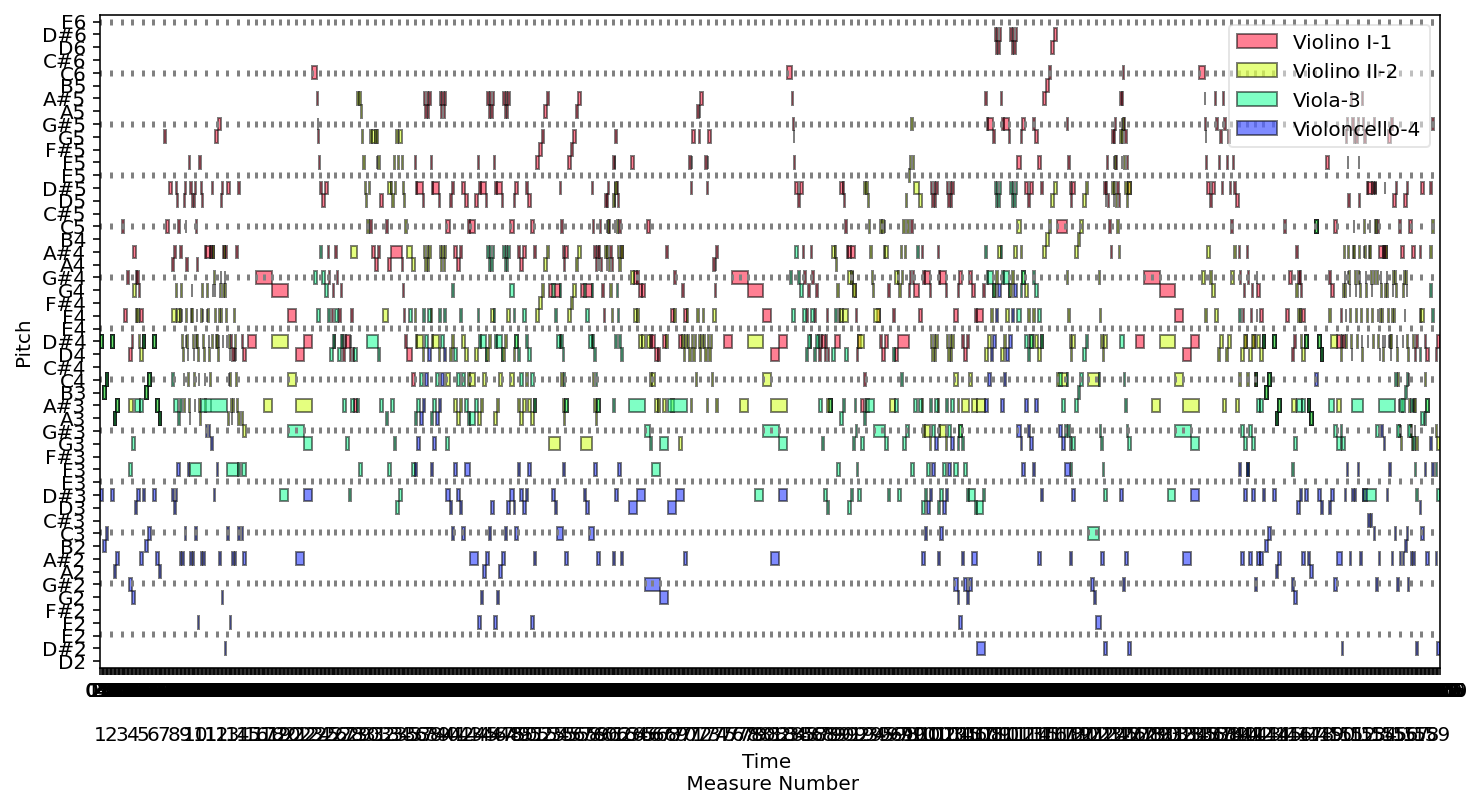

In [5]:
m_df = mp.parse.with_xml_file(file=xml_file, 
                              plot_pianoroll=True, 
                              plot_inline_ipynb=True)

Jede Stimme wird mit einer eigenen Farbe dargestellt. 
Spielen zwei Stimmen unisono (also dieselben Noten), mischen sich die beiden Farben. 

Öffnen Sie nun bitte die Notendatei: Speichern Sie die Datei zunächst auf Ihrer Festplatte (in der Notendatenbank: Rechtsklick auf den Link -> 'Ziel speichern unter'), öffnen Sie Ihren Noteneditor (z.B. MuseScore) und laden Sie die Datei. 

Vergleichen Sie nun die Notendarstellung mit der Pianorollendarstellung. 
Wo unterscheiden sich die beiden Darstellungen?
Was können Sie auf der Pianorollen-Grafik erkennen?
Wo liegen die Vorteile der Pianorolle gegenüber dem Notentext? Welche Nachteile gibt es?

Hier eine alternative Möglichkeit der Darstellung durch die Auswahl *externe/interne* Darstellung: Durch die Aktivierung des Befehls '%matplotlib' wird die Anzeige auf ein externes Pop-Up-Fenster umgestellt. Davon sind auch alle folgenden Grafiken betroffen!

Using matplotlib backend: MacOSX
File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


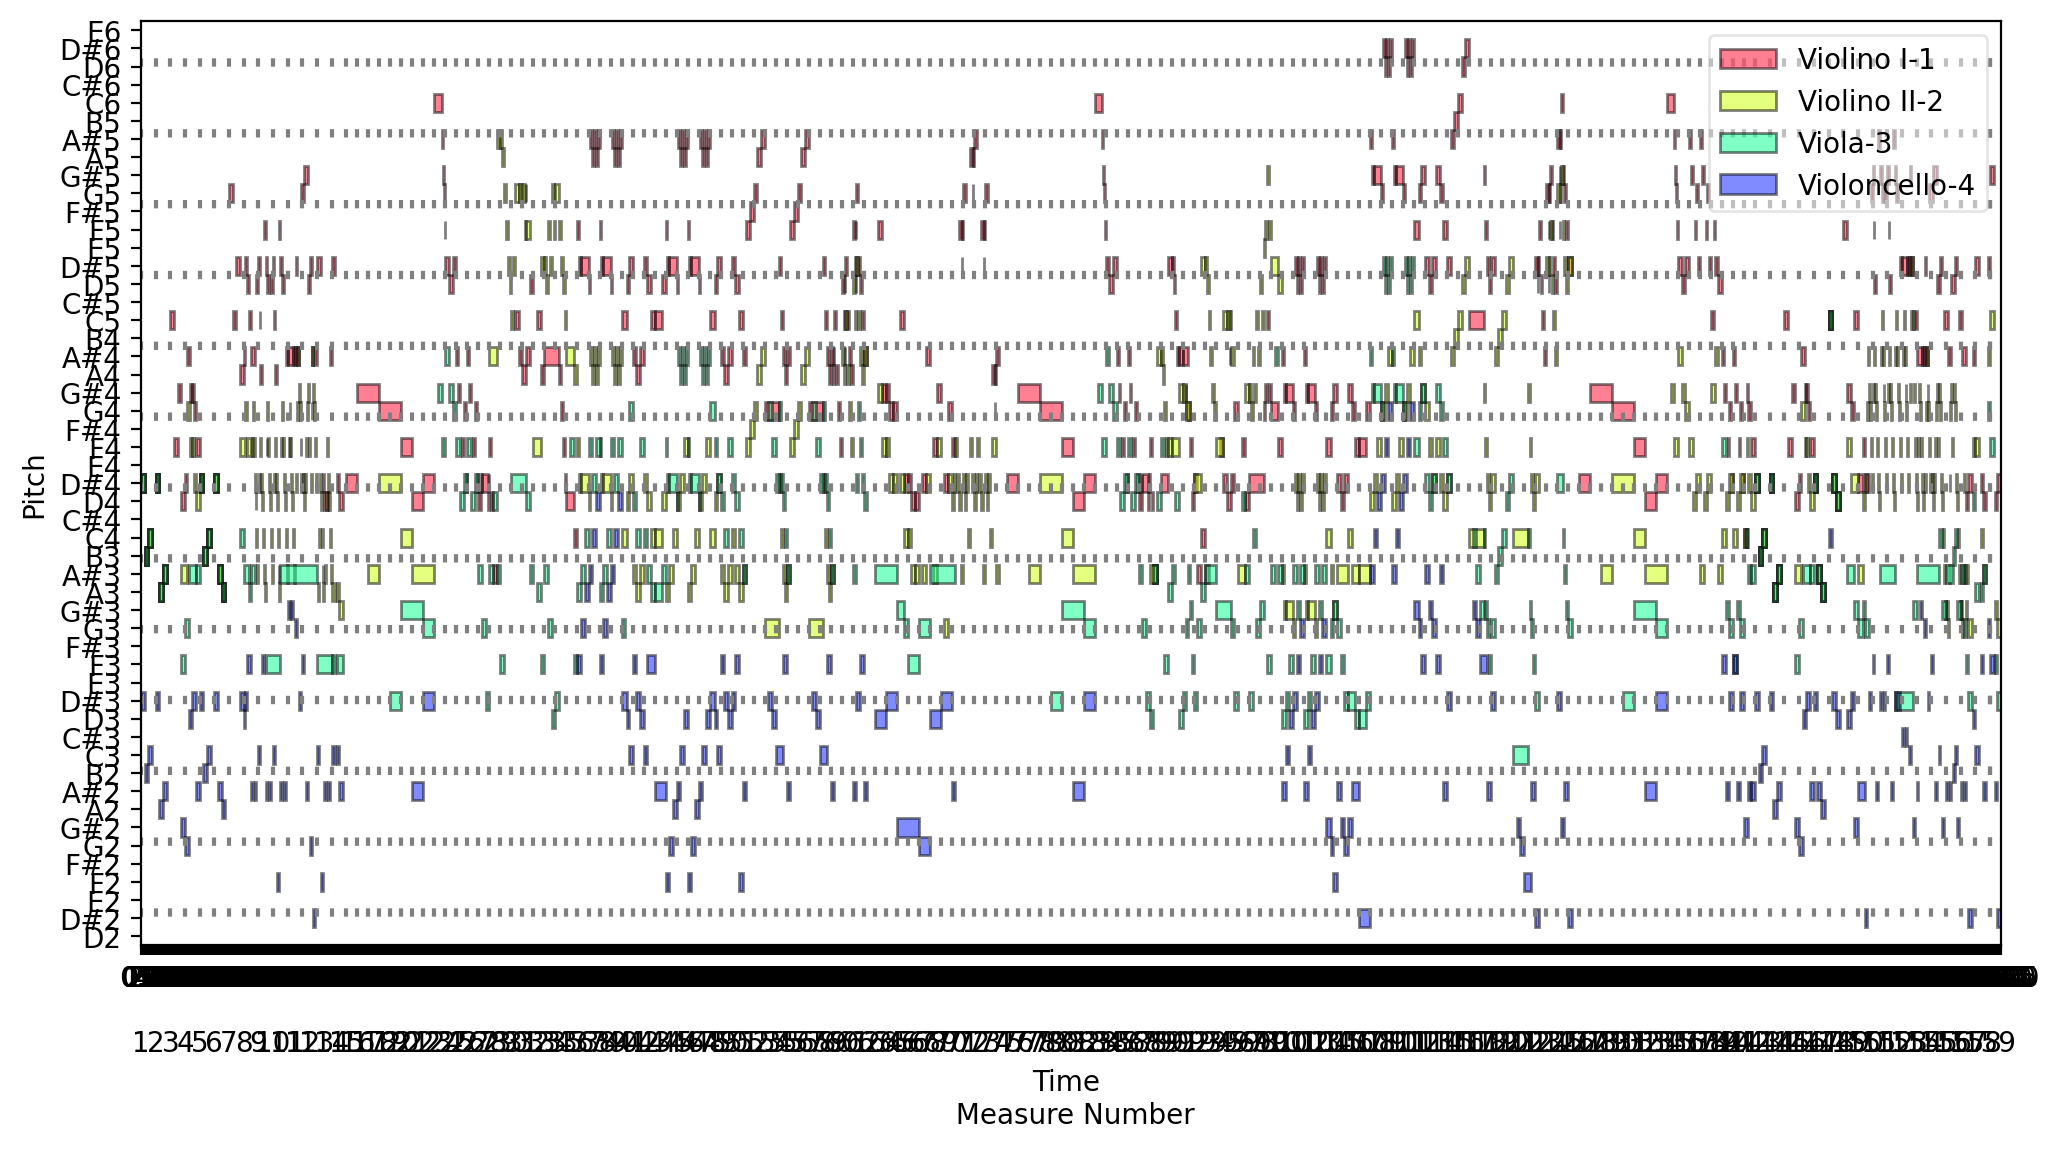

In [6]:
%matplotlib
# Durch diesen Befehl (Aktivierung durch Löschen von #)
# wird eine externe Darstellung gewählt. 

m_df = mp.parse.with_xml_file(file=xml_file, 
                              plot_pianoroll=True, 
                              plot_inline_ipynb=True)

Wollen Sie auf die Darstellung im Browser zurückschalten, müssen Sie den folgenden Befehl ausführen: 

In [7]:
%matplotlib inline

Im folgenden Code-Fenster werden einige Parameter erklärt, mit denen der Befehl oben weiter modifiziert werden kann. Dabei sind jeweils die Standardeinstellungen angegeben, die gelten solange der Parameter nicht eigens aufgerufen wird, und es ist jeweils vermerkt, ob ein String (Zeichenfolge: 'str' oder None), eine Zahl oder ein Wert ('bool', in der Regel 'True', 'False' oder 'None') eingegeben werden muss. 

In [5]:
m_df = mp.parse.with_xml_file(xml_file,
        #file= str, (string value)  # Möglichkeit für andere Variablennamen, unter denen Sie Notendateien geladen haben.
                                    # Voreinstellung: xml_file
        #plot_pianoroll= bool       # Piano-Roll darstellen; Voreinstellung: False
        #plot_inline_ipynb= bool    # überschreibt Matplotlib
        #do_save= bool              # bei do_save=True wird das Dataframe gespeichert; Voreinstellung: False
        #save_at= str               # hiermit wird der Dateipfad festgelegt; Voreinstellung: None 
        #save_file_name= str        # hier wird der Dateiname festgelegt; Voreinstellung: None
        #x_axis_res= Zahl           # Auflösung der X-Achse als Teiler der Viertelnote; Voreinstellung: 2 (=0.5 Viertelnote)
        #ignore_upbeat= bool        # Auftaktkorrektur ignorieren; Voreinstellung: False
        #ignore_ties= bool          # Bindebögen-Kalkulation ignorieren; Voreinstellung: False
                             )

File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


### 5. Auswahl von Stimmen bzw. Takten<a id='auswahl'></a>

Durch den folgenden Befehl können flexibel Stimmen und Takte ausgewählt werden - für grafische Darstellungen oder statistische Abfragen. Im folgenden Beispiel werden die ersten 5 Takte ('Measure':'1-5') der ersten beiden Stimmen ('PartID':'1-2') ausgewählt: 

File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


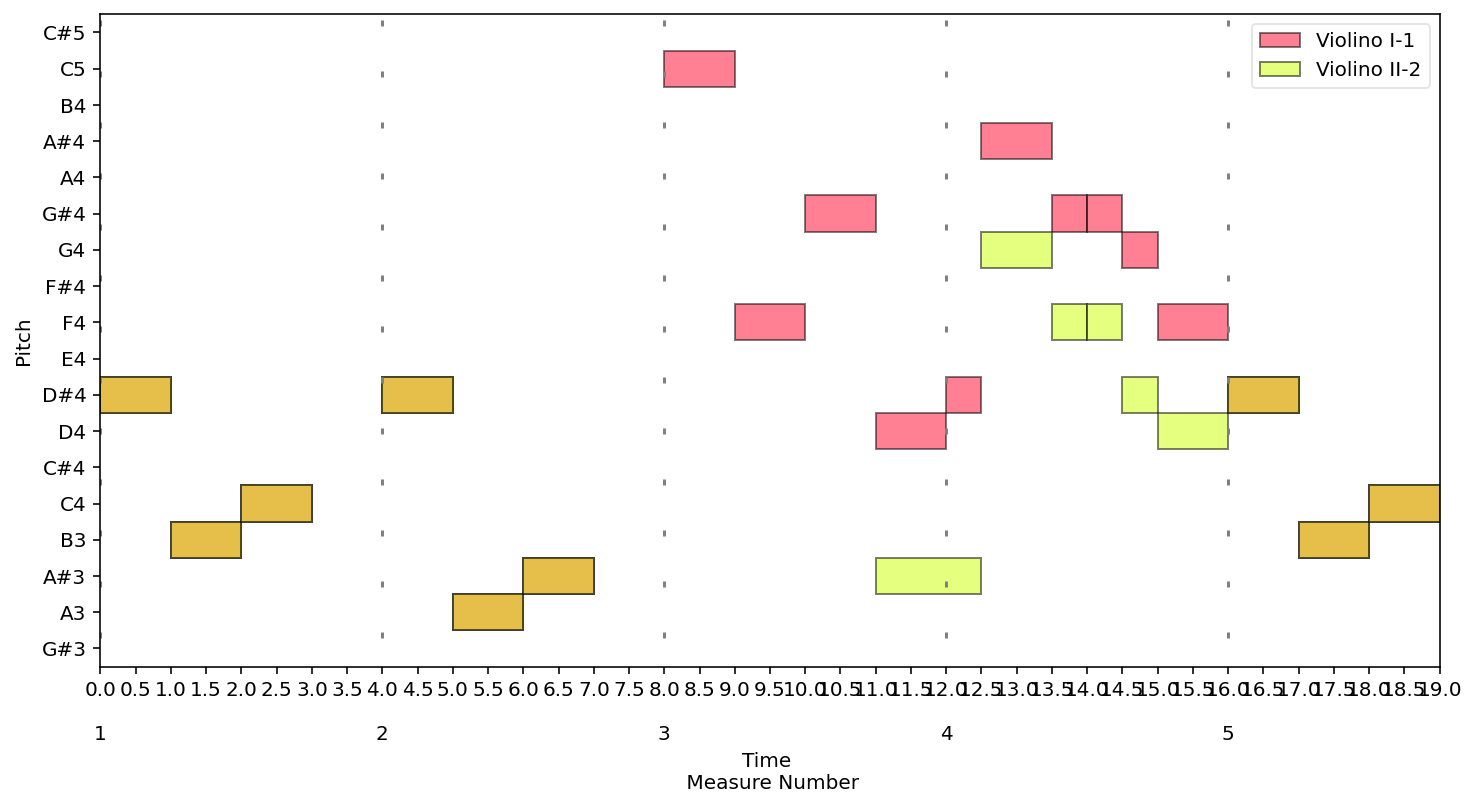

In [6]:
%matplotlib inline
# Zunächst wird ein Filter mit dem Namen 'filter_dict_t' definiert. 

filter_dict_t = {'PartID':'1-2', 'Measure':'1-5'}

# Anschließend wird dem Pianorollenbefehl (s. oben) der Filter als weiterer Parameter hinzugefügt:
# filter_dict=filter_dict_t

m_df_2 = mp.parse.with_xml_file(file=xml_file,
                                plot_pianoroll=True,
                                plot_inline_ipynb=True,
                                filter_dict=filter_dict_t)

Bei diesem Ausschnitt sehen Sie, wie zu Beginn die beiden Violinen unisono spielen (Takt 1 und 2, braun), dann eigene Stimmen (Takt 3/4) und in Takt 5 wieder unisono. 

Sie können die Auswahl beliebig verändern, indem sie die Angaben der Stimmen und Takte (rot in der Code Cell) verändern. 
Sie können auch andere Filtern mit andere Filternamen definideren; dann müssen Sie aber den neuen Filter in die letzte Zeile einfügen: filter_dict= [Filtername]

### 6. Aufgaben<a id='aufgaben'></a>

1. Wählen Sie anhand der Partitur verschiedene Abschnitte der Komposition, schreiben Sie entsprechende Filter und visualisieren Sie die Abschnitte mit eigenen Pianorollen-Darstellungen. 
Vergleichen Sie den Verlauf der vier Stimmen, indem Sie für jede Stimme eine eigene Pianorollen-Darstellung generieren. 

2. Generieren Sie Pianorollendarstellungen von anderen Kompositionen und machen Sie sich auf diese Weise mit dem Jupyter-Notebook vertraut. 